In [1]:
# Stuff that will appear at the top of notebooks;
# You don't have to understand how this works or change it for now.

from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

# Demo 1: SBCC Basic Needs - Nutritional Health and Food Security
[SBCC Basic Needs Website](https://www.sbcc.edu/equity/basic-needs-programs/)
*Food Pantry*, 
*CalFresh*, is a nutrition assistance program that helps low income individuals and families buy food that they need

[<img src="calfresh-logo.png" width="150" height="70"/>](https://www.sbcc.edu/equity/basic-needs-programs/calfresh-information.php)


The data set used below came from: https://www.cdss.ca.gov/inforesources/data-portal/research-and-data/calfresh-data-dashboard

In [2]:
CalFresh_recipients = Table().read_table('CalFreshAnnual.csv')
CalFresh_recipients 

Year of Calendar Year,Statewide,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,Glenn,Humboldt,Imperial,Inyo,Kern,Kings,Lake,Lassen,Los Angeles,Madera,Marin,Mariposa,Mendocino,Merced,Modoc,Mono,Monterey,Napa,Nevada,Orange,Placer,Plumas,Riverside,Sacramento,San Benito,San Bernardino,San Diego,San Francisco,San Joaquin,San Luis Obispo,San Mateo,Santa Barbara,Santa Clara,Santa Cruz,Shasta,Sierra,Siskiyou,Solano,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
2014,"2,063,163","63,775",112,"1,754","15,499","2,755",715,"35,192","2,527","6,841","95,691","1,499","10,376","15,857","1,062","61,676","10,171","5,504","1,542","581,170","11,524","6,177","1,027","7,422","24,110",462,527,"22,112","3,503","4,165","116,779","9,218",970,"124,200","101,078","2,714","172,181","134,214","32,890","50,060","9,576","16,010","15,992","54,882","12,501","12,565",167,"3,191","22,135","19,298","42,554","5,575","4,862",964,"50,866","2,998","35,063","8,934","5,977"
2015,"2,133,656","61,906",101,"1,782","16,561","2,903",664,"35,594","2,519","7,302","100,575","1,510","12,048","17,258","1,056","67,625","10,638","6,334","1,544","585,411","12,093","6,440","1,109","7,060","25,129",461,497,"23,103","3,632","4,272","122,874","9,394","1,095","129,097","104,581","2,723","180,279","142,648","33,997","52,985","10,032","16,188","17,377","55,269","13,845","13,014",172,"3,277","22,904","20,042","43,235","5,694","4,771","1,020","52,964","3,135","37,383","10,288","6,251"
2016,"2,097,658","60,502",92,"1,760","16,975","2,812",627,"34,040","2,606","7,175","101,381","1,555","12,517","17,508","1,056","70,633","10,820","6,611","1,569","558,922","12,018","6,246","1,090","6,709","24,517",516,453,"22,713","3,547","4,347","123,182","9,286","1,160","129,010","102,439","2,544","178,495","142,006","34,877","51,667","9,958","15,148","18,573","52,730","14,633","12,943",161,"3,213","22,398","18,932","41,902","5,727","4,568","1,008","52,436","3,139","37,376","10,645","6,187"
2017,"1,999,190","57,278",81,"1,661","16,660","2,797",687,"31,521","2,570","6,796","96,943","1,501","12,115","17,267","1,015","68,976","10,632","6,419","1,564","539,485","11,498","5,969","1,017","6,287","23,507",552,414,"21,141","3,192","4,119","116,211","8,726","1,141","122,659","98,310","2,226","166,402","134,122","33,959","48,347","9,538","13,596","18,752","47,340","14,472","12,401",161,"3,096","21,073","17,282","39,581","5,495","4,272",971,"51,260","2,840","35,322","9,995","5,979"
2018,"1,947,113","54,814",75,"1,522","16,872","2,733",658,"30,456","2,524","6,400","92,759","1,491","11,902","16,894","1,021","67,144","10,523","6,280","1,485","549,893","11,086","5,975","1,023","6,126","22,738",598,387,"19,334","2,904","4,144","109,025","8,351","1,142","115,958","94,665","2,114","156,113","132,419","32,750","45,416","9,173","12,310","19,928","42,596","14,271","12,106",141,"3,153","20,191","16,160","36,855","5,134","4,155",972,"49,909","2,692","33,673","9,951","6,034"
2019,"1,887,517","54,458",69,"1,353","15,272","2,527",627,"29,104","2,525","6,033","90,233","1,454","12,136","16,107",889,"63,779","10,066","6,378","1,471","564,990","10,189","5,265","1,041","5,842","21,794",631,329,"16,672","2,655","4,266","96,853","7,640","1,123","107,742","93,545","1,985","143,134","128,314","36,121","41,527","8,651","10,857","19,536","41,059","13,281","12,476",131,"3,223","18,798","13,696","33,626","4,775","4,321",920,"46,371","2,655","30,777","10,127","6,101"
2020,"2,412,909","78,264",72,"1,531","17,809","2,933",874,"40,142","3,156","7,333","99,409","1,687","14,443","18,398","1,093","75,639","11,745","7,663","1,797","764,063","12,356","8,006","1,406","7,113","25,090",764,492,"20,241","3,817","5,184","127,311","9,398","1,334","128,893","115,705","2,547","161,633","181,037","55,150","48,723","10,699","15,115","24,803","57,415","16,799","14,471",170,"4,121","24,623","18,841","38,409","5,681","5,278","1,090","50,978","3,211","36,707","13,014","7,232"
2021,"2,482,841","85,592",64,"

In [3]:
# Let's focus in and look at a couple of columns
CalFresh_recipients.select('Year of Calendar Year', 'Statewide')

Year of Calendar Year,Statewide
2014,"2,063,163"
2015,"2,133,656"
2016,"2,097,658"
2017,"1,999,190"
2018,"1,947,113"
2019,"1,887,517"
2020,"2,412,909"
2021,"2,482,841"
2022,"2,795,730"
2023,"3,049,919"


In [4]:
# TODO: Try plotting the state data
CalFresh_recipients.plot('Year of Calendar Year', 'Statewide')

ValueError: The column 'Statewide' contains non-numerical values. A plot cannot be drawn for this column.

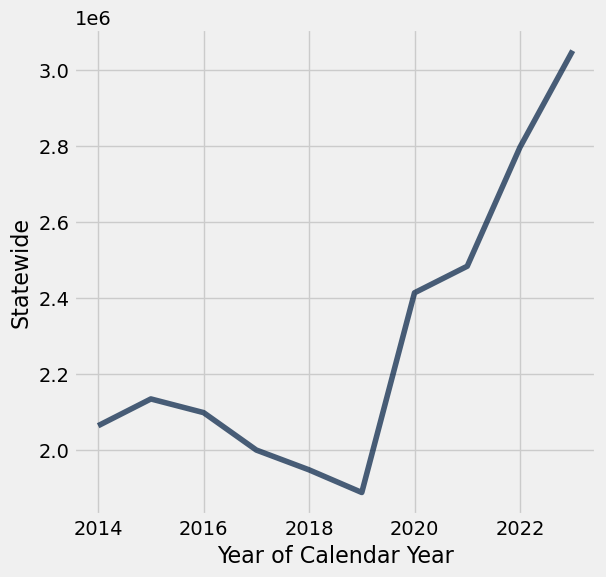

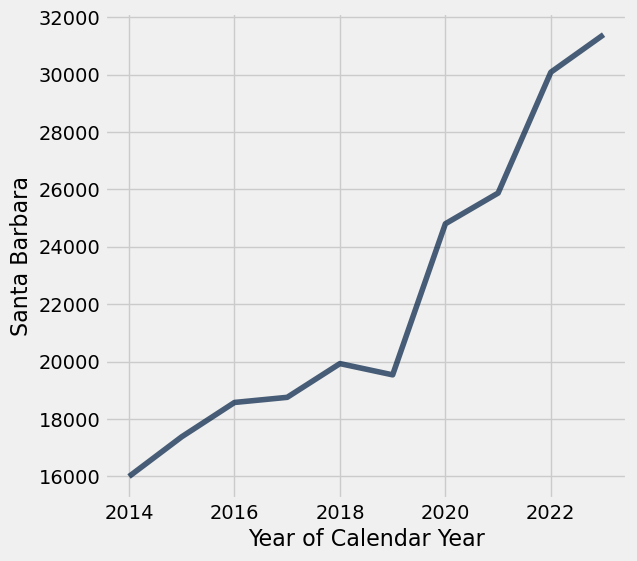

In [5]:
# This code will fix the formatting error above :)

formatter = NumberFormatter()
for i in range(1, CalFresh_recipients.num_columns):
    CalFresh_recipients = CalFresh_recipients.with_column(CalFresh_recipients.labels[i], CalFresh_recipients.apply(formatter.convert_value,i))
CalFresh_recipients
# Let's try again
CalFresh_recipients.plot('Year of Calendar Year', 'Statewide')

#Let's compare the trend of SB with the Statewide trend
CalFresh_recipients.plot('Year of Calendar Year', 'Santa Barbara')


# Demo 2: let's look at 2 classics novels
This is from example in book section 1.3

In [6]:
# Read two books, fast!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
# Read the book and save it as a string
huck_finn_text = read_url(huck_finn_url)
#Split the book up by chapter and save the chapters as separate strings in a list                
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [7]:
huck_finn_chapters

['I. YOU don\'t know about me without you have read a book by the name of The Adventures of Tom Sawyer; but that ain\'t no matter. That book was made by Mr. Mark Twain, and he told the truth, mainly. There was things which he stretched, but mainly he told the truth. That is nothing. I never seen anybody but lied one time or another, without it was Aunt Polly, or the widow, or maybe Mary. Aunt Polly--Tom\'s Aunt Polly, she is--and Mary, and the Widow Douglas is all told about in that book, which is mostly a true book, with some stretchers, as I said before. Now the way that the book winds up is this: Tom and me found the money that the robbers hid in the cave, and it made us rich. We got six thousand dollars apiece--all gold. It was an awful sight of money when it was piled up. Well, Judge Thatcher he took it and put it out at interest, and it fetched us a dollar a day apiece all the year round--more than a body could tell what to do with. The Widow Douglas she took me for her son, and 

## What can we learn about the book: 
# The Adventures of Huckleberry Finn by Mark Twain


In [8]:
#let's create a table with a column representing chapters from Huck Finn
huck_finn = Table().with_column('Chapters', huck_finn_chapters)
huck_finn


Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


In [9]:
# Let's count how many times Tom is mentioned
np.char.count(huck_finn_chapters, 'Tom')

array([ 6, 24,  5,  0,  0,  0,  2,  2,  0,  0,  2,  3,  1,  0,  0,  0,  3,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  4, 19, 15,
       14, 18,  9, 32, 11, 11,  8, 30,  6])

In [10]:
# Let's count how many times Jim is mentioned
np.char.count(huck_finn_chapters, 'Jim')

array([ 0, 16,  0,  8,  0,  0,  0, 22, 11, 19,  4, 20,  9,  6, 16, 28,  0,
       10, 13, 18,  1,  0,  9,  5,  0,  0,  0,  1,  3,  5, 17,  0,  5, 17,
       18, 23,  4, 27, 10, 13,  0, 12,  6])

In [11]:
# TODO: create a table with counts: Count how many times the names Jim, Tom, and Huck appear in each chapter 
counts = Table().with_columns('Tom',np.char.count(huck_finn_chapters, 'Tom'),
                             'Jim',np.char.count(huck_finn_chapters, 'Jim'),
                             'Huck', np.char.count(huck_finn_chapters, 'Huck'))
counts


Tom,Jim,Huck
6,0,3
24,16,2
5,0,2
0,8,1
0,0,0
0,0,2
2,0,0
2,22,5
0,11,1
0,19,0


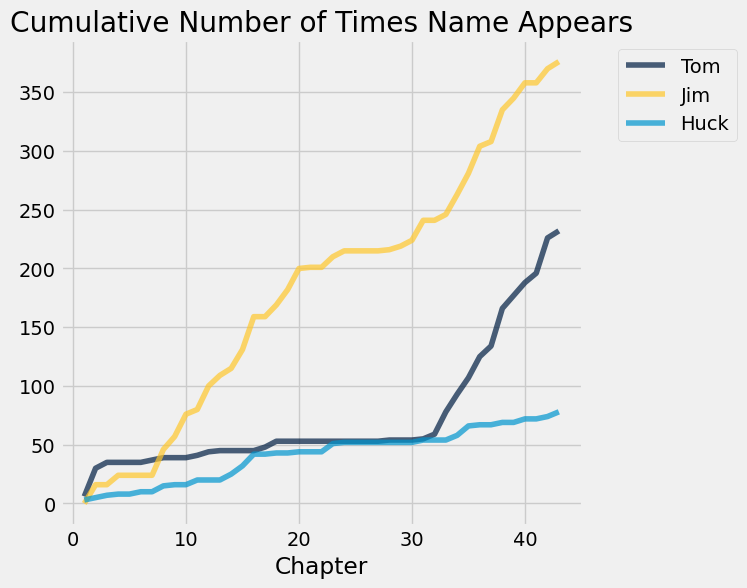

In [12]:
# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Name Appears');

What can we guess about the characters from this visualization?

# Let's RECAP with the book: Little Women
## Tables
- Let's visualize the chapters in a table
- Create a Table with column Chapter
- What would be interesting to explore? 
- How about counting the number of times the characters are mentioned in the book?


In [13]:
little_women_chapters

['ONE PLAYING PILGRIMS "Christmas won\'t be Christmas without any presents," grumbled Jo, lying on the rug. "It\'s so dreadful to be poor!" sighed Meg, looking down at her old dress. "I don\'t think it\'s fair for some girls to have plenty of pretty things, and other girls nothing at all," added little Amy, with an injured sniff. "We\'ve got Father and Mother, and each other," said Beth contentedly from her corner. The four young faces on which the firelight shone brightened at the cheerful words, but darkened again as Jo said sadly, "We haven\'t got Father, and shall not have him for a long time." She didn\'t say "perhaps never," but each silently added it, thinking of Father far away, where the fighting was. Nobody spoke for a minute; then Meg said in an altered tone, "You know the reason Mother proposed not having any presents this Christmas was because it is going to be a hard winter for everyone; and she thinks we ought not to spend money for pleasure, when our men are suffering s

In [14]:
#creating a table with chapters in Little Women book
little_W = Table().with_column('Chapter',little_women_chapters )
little_W

Chapter
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


In [15]:
# Let's count the names of the characters in the chapters and create a table of counts for each chapter
# Character are 'Amy', 'Beth', 'Jo', 'Laurie', 'Meg'
counts = Table().with_columns('Amy',np.char.count(little_women_chapters, 'Amy'),
                             'Beth',np.char.count(little_women_chapters, 'Beth'),
                             'Jo', np.char.count(little_women_chapters, 'Jo'),
                             'Laurie',np.char.count(little_women_chapters, 'Laurie'),
                             'Meg', np.char.count(little_women_chapters, 'Meg'))
counts

Amy,Beth,Jo,Laurie,Meg
23,26,44,0,26
13,12,21,0,20
2,2,62,16,36
14,18,34,0,17
6,14,55,35,13
6,28,13,9,5
27,5,9,7,5
48,9,71,17,16
3,5,21,24,71
5,5,12,4,4


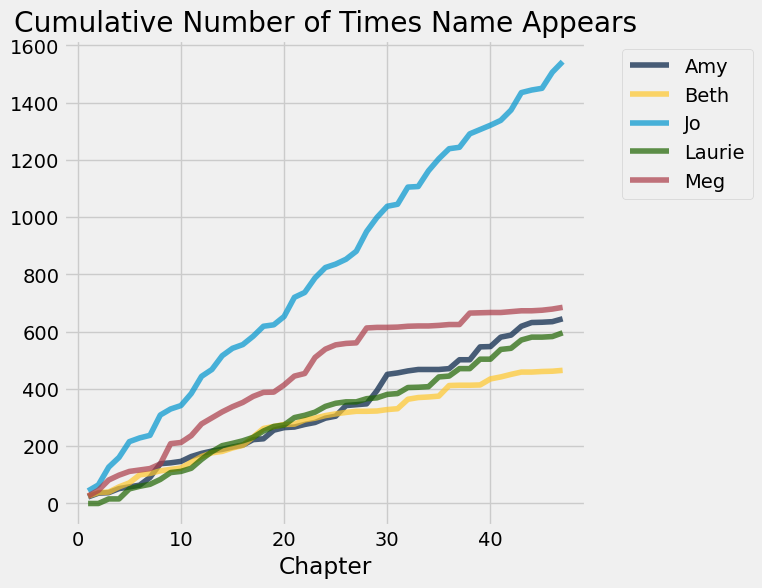

In [16]:
# Plot the cumulative counts
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Name Appears');

Can we make any guesses about what happens to the characters? At some point, one of the women marries Laurie (the neighbor), can you guess who? Why?

Are you interested in another question? Maybe how many times you find the word "Christmas" or "winter" in the book? Will this give us an idea on how much time has gone by?

# Basic Python arithmatic
Let's add, divide, multiply, etc

In [17]:
value = 34 - 8


In [18]:
age = 21

age_in_decade = age + 10
age_in_decade


31

In [19]:
value * 2


52

In [20]:
34//3

11

In [21]:
34 % 3

1

In [22]:
value = -32

In [23]:
result = abs(value)
result

32

In [24]:
max(abs(-212), 43, result, 100)

212

In [25]:
huck_finn = Table().with_column("Chapter", huck_finn_chapters)
huck_finn


Chapter
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


In [26]:
counts = Table().with_columns('Tom',np.char.count(huck_finn_chapters, 'Tom'),
                             'Jim',np.char.count(huck_finn_chapters, 'Jim'),
                             'Huck',np.char.count(huck_finn_chapters, 'Huck'))
counts

Tom,Jim,Huck
6,0,3
24,16,2
5,0,2
0,8,1
0,0,0
0,0,2
2,0,0
2,22,5
0,11,1
0,19,0


In [27]:
# TODO: Try out some of the basics, select, drop, where...
counts.select('Tom').where('Tom', are.above(5))

Tom
6
24
19
15
14
18
9
32
11
11


# Another Table Demo: How many periods in a chapter?

In [28]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_hf = Table().with_columns([
        'HF Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_lw = Table().with_columns([
        'LW Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

In [29]:
# The counts for Huckleberry Finn

chars_periods_hf.show(3)

HF Chapter Length,Number of Periods
7026,66
11982,117
8529,72


In [30]:
# The counts for Little Women

chars_periods_lw.show(3)

LW Chapter Length,Number of Periods
21759,189
22148,188
20558,231


In [31]:
# What can we observe?

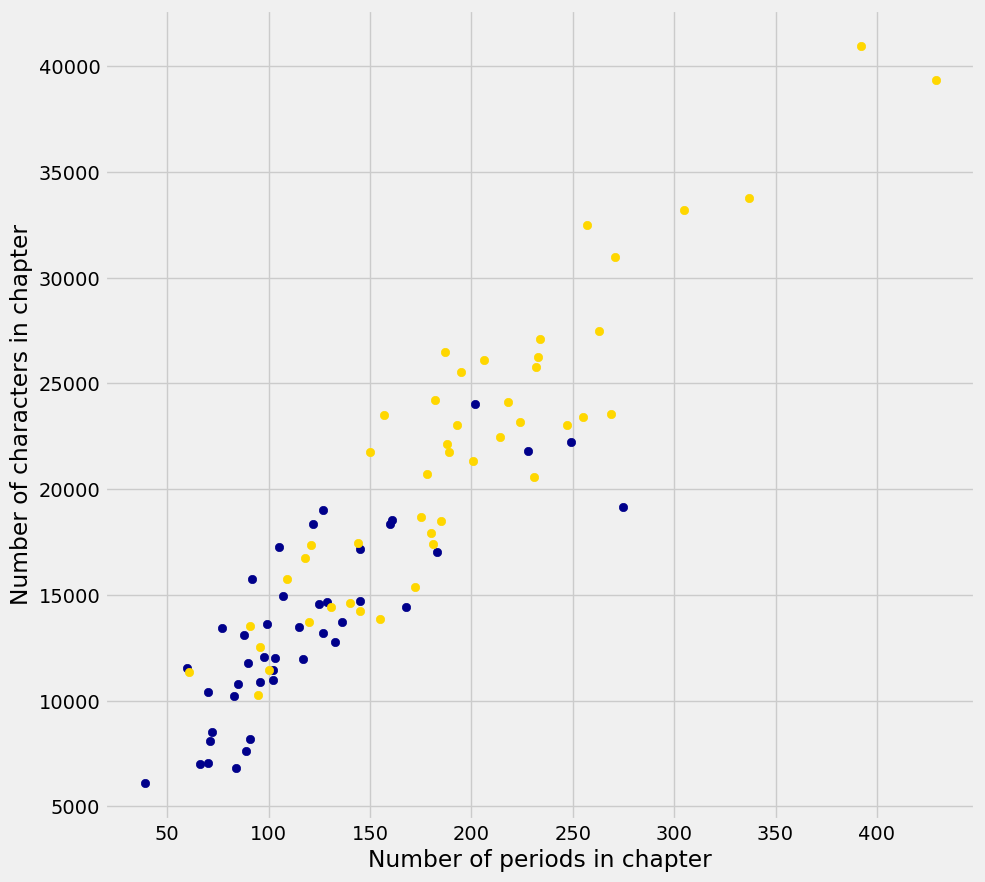

In [32]:
plots.figure(figsize=(10,10))
plots.scatter(chars_periods_hf[1], chars_periods_hf[0], color='darkblue')
plots.scatter(chars_periods_lw[1], chars_periods_lw[0], color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

# On Average what appears to be the sentence length?

Can estimate the length of a sentence based on the number of characters and number of periods?

In [33]:
sentenceLength_hf = chars_periods_hf[0]/chars_periods_hf[1]
sentenceLength_hf


array([ 106.45454545,  102.41025641,  118.45833333,   80.94047619,
         89.73626374,  116.4       ,  104.07874016,   89.18875502,
        113.81690141,  100.51428571,   85.93452381,  113.68217054,
        123.30120482,   85.61797753,  122.91836735,   93.04371585,
        118.49655172,  118.96534653,  164.37142857,  150.31147541,
         69.71636364,  149.01428571,  112.17647059,  116.90291262,
        139.91588785,  101.49655172,  137.45454545,  114.66875   ,
        149.90551181,  156.8974359 ,  115.04968944,  130.74444444,
        117.09565217,  107.52941176,  100.82352941,  126.96470588,
        148.80681818,   96.07518797,  113.16666667,  192.23333333,
        174.41558442,  171.23913043,   95.60526316])

In [34]:
sentenceLength_lw = chars_periods_lw[0]/chars_periods_lw[1]
sentenceLength_lw

array([ 115.12698413,  117.80851064,   88.995671  ,  130.9025641 ,
         91.74509804,  104.44285714,  110.16030534,  105.02803738,
        100.19881306,  100.04324324,  119.29533679,   91.75524476,
        106.68      ,   99.57777778,   96.04972376,   89.26162791,
         89.54193548,  121.05555556,  143.2892562 ,   98.28965517,
         87.52788104,  114.23333333,   93.17813765,  133.18131868,
        148.63736264,  144.92666667,  144.53211009,  114.36162362,
        112.67811159,  110.72018349,  116.42134831,  103.38392857,
        111.10775862,  126.44357977,  106.0199005 ,  114.41      ,
        149.8343949 ,  126.65533981,  104.46007605,  186.36065574,
        141.51871658,  141.97457627,  108.85901639,  108.30526316,
        130.8125    ,  115.78632479,  104.42602041])

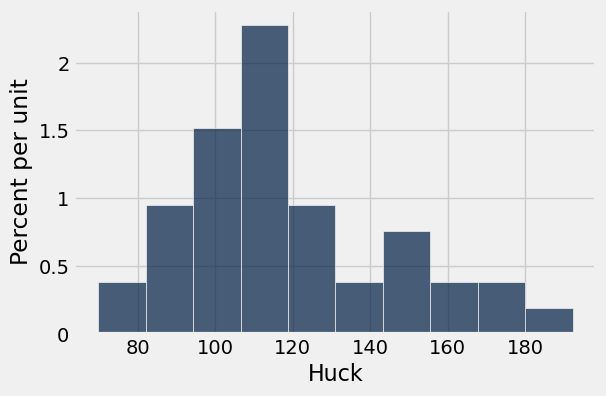

In [35]:
Table().with_columns('Huck', sentenceLength_hf).hist()

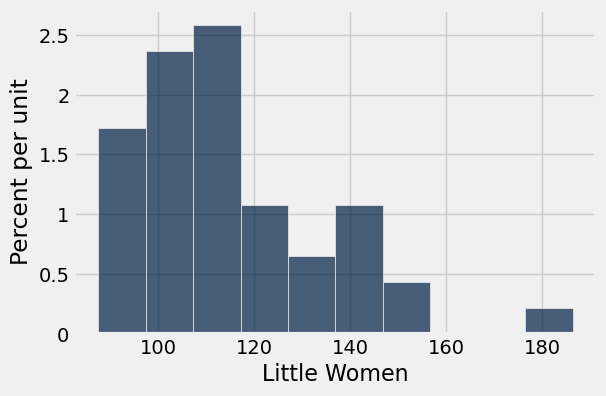

In [36]:
# How long are sentences on average?
#TODO: Try this now with the "Little Women". Is the histogram similar/different?

Table().with_columns('Little Women', sentenceLength_lw).hist()

Interestingly: on Twitter: max length of tweet was 140 until 2017, and only recently became longer. Today it is 280. Check out this interesting study on how character limits affected language useage: https://www.nature.com/articles/s41599-019-0280-3

### Another example: Reading in a Table from a comma seperated value (.csv) file

The table `California_airquality.csv` contains data on air quality in California 1/1/2020 through 9/10/2020 of the air quality index in California as measured by PM2.5, the main pollutant from fire (data is from 2 sources: AQS, AirNow). I found the dataset on Kaggle, direct link here:https://www.kaggle.com/thaddeussegura/california-air-quality-2020-through-sept10th. Kaggle is an open source/free platform where anyone interested in data science can share code and data sets (https://www.kaggle.com/datasets).

In [37]:
CalAQI = Table.read_table('California_airquality.csv')
CalAQI
#TODO: narrow down table to only selecting what we want to look at
# For example: Date, Site Name, DAILY_AQI_VALUE
onlyAQI = CalAQI.select('Date', 'Site Name', 'DAILY_AQI_VALUE')
onlyAQI

Date,Site Name,DAILY_AQI_VALUE
1/1/20,Livermore,36
1/2/20,Livermore,19
1/3/20,Livermore,55
1/4/20,Livermore,45
1/5/20,Livermore,33
1/6/20,Livermore,26
1/7/20,Livermore,29
1/8/20,Livermore,13
1/9/20,Livermore,25
1/10/20,Livermore,23


### Table operations
Selecting specific columns;
Sorting the data;
Finding where a specific value in a column is set to value of interest:
for example, let's see if we can find Site Name = SB

In [38]:
# look for when Santa Barbara had high AQI during this time
onlyAQI.where('Site Name', 'Santa Barbara').where('DAILY_AQI_VALUE', are.above(100))


Date,Site Name,DAILY_AQI_VALUE
8/20/20,Santa Barbara,112
8/21/20,Santa Barbara,125
